In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Cabin"].fillna("No cabin",inplace=True)
df["Embarked"].fillna('S',inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [11]:
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [12]:
# numerical data

df_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
## Outliers

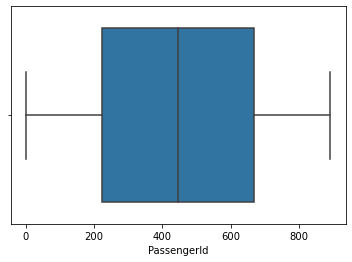

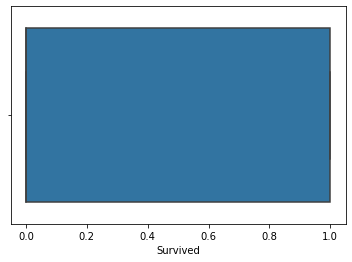

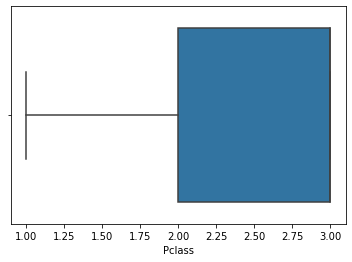

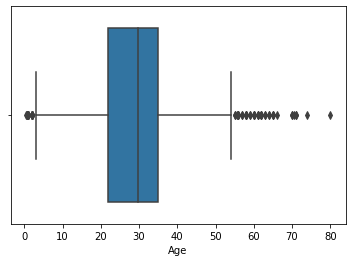

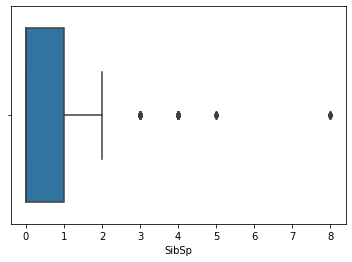

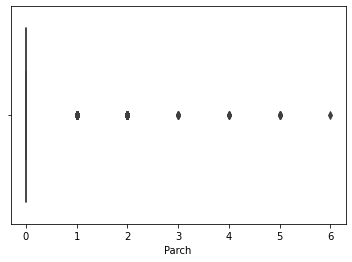

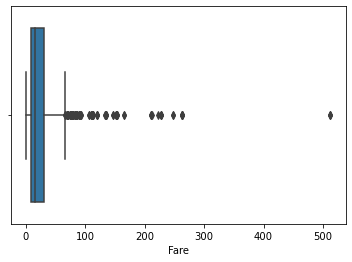

In [14]:
for col in df_num:
  plt.figure()
  sns.boxplot(df_num[col])
  plt.show()

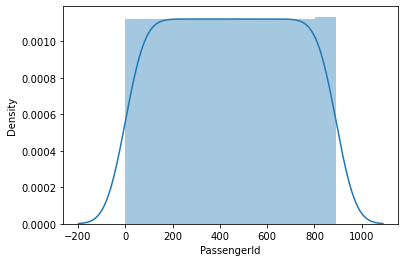

0.0


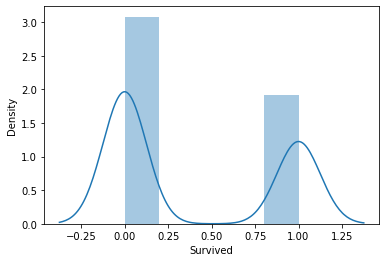

0.4777174662568536


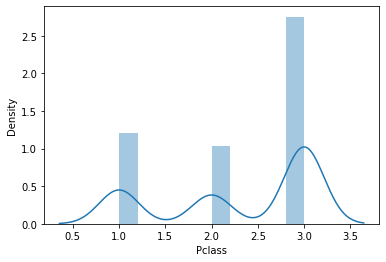

-0.6294858816096934


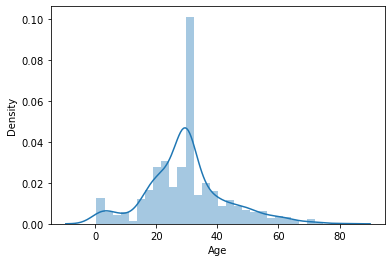

0.4337562902461274


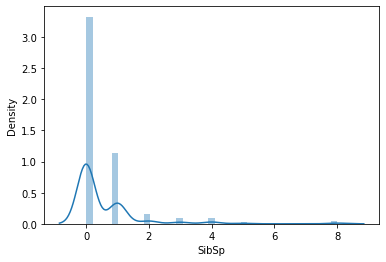

3.6891276847759507


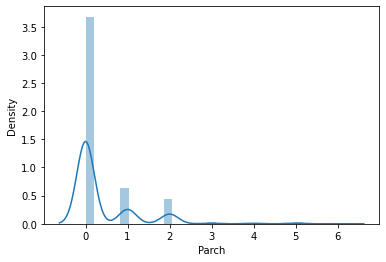

2.7444867379203735


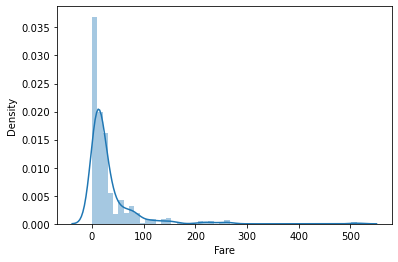

4.7792532923723545


In [15]:
# skewness

from scipy.stats import skew
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(skew(df_num[col]))

<AxesSubplot:>

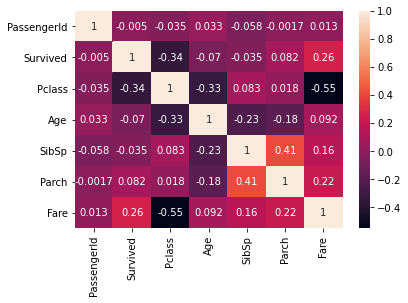

In [16]:
sns.heatmap(df_num.corr(), annot=True)

In [17]:
# categorical
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,No cabin,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,No cabin,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,No cabin,S


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [20]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [21]:
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,523,146,2
1,2,1,1,38.0,1,0,71.2833,190,0,596,81,0
2,3,1,3,26.0,0,0,7.9250,353,0,669,146,2
3,4,1,1,35.0,1,0,53.1000,272,0,49,55,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,146,2


In [22]:
X = df.iloc[:,:1]
y = df.iloc[:,-1]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
#Entropy
dt = DecisionTreeClassifier(criterion="entropy")

In [25]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
dt.score(X_train,y_train)

1.0

In [27]:
y_pred = dt.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           C       0.22      0.18      0.20        56
           Q       0.16      0.12      0.14        25
           S       0.71      0.78      0.74       187

    accuracy                           0.59       268
   macro avg       0.36      0.36      0.36       268
weighted avg       0.56      0.59      0.57       268



In [29]:
# gini
dt1 = DecisionTreeClassifier()

In [30]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
dt1.score(X_train,y_train)

1.0

In [32]:
y_pred = dt1.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           C       0.22      0.18      0.20        56
           Q       0.16      0.12      0.14        25
           S       0.71      0.78      0.74       187

    accuracy                           0.59       268
   macro avg       0.36      0.36      0.36       268
weighted avg       0.56      0.59      0.57       268



In [34]:
# pruning
dt = DecisionTreeClassifier(max_depth=10)

In [35]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [36]:
y_pred = dt.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           C       0.25      0.09      0.13        56
           Q       0.00      0.00      0.00        25
           S       0.70      0.93      0.80       187

    accuracy                           0.66       268
   macro avg       0.32      0.34      0.31       268
weighted avg       0.54      0.66      0.59       268



In [38]:
dt = DecisionTreeClassifier(min_samples_leaf=30)

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=30)

In [40]:
y_pred = dt.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00        56
           Q       0.00      0.00      0.00        25
           S       0.70      1.00      0.82       187

    accuracy                           0.70       268
   macro avg       0.23      0.33      0.27       268
weighted avg       0.49      0.70      0.57       268



In [42]:
dt.feature_importances_

array([1.])

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')